In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

코랩 사용하시는 분들은 아래의 코드를 실행해주세요!

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import os
# os.getcwd()

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [4]:
# path = './drive/MyDrive/...'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
# os.chdir(path)

In [5]:
# os.getcwd()

사용할 데이터 셋 :  전력 사용량 예측 모델

아래의 과정에서 sklearn의 Pipeline의 사용은 필수는 아닙니다. 선호와 필요에 따라 사용하실 분들은 사용하셔도 좋습니다.

# 데이터

건물 정보와 기후 정보를 활용한 전력사용량 예측 데이터 중에서 

환경 변수(기온, 풍속, 습도, 강수량, 일조)에 대해 전력 사용량을 선형회귀 모델을 사용해서 예측해보고자 합니다.

In [73]:
var_name = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun']
target = 'Wh'

In [74]:
def parsing(data: pd.DataFrame):
    x = data.iloc[:, 3:8]
    x.columns = var_name
    y = data.iloc[:, 2]
    y.name = target
    
    return x, y

In [75]:
def load_data():
    data = pd.read_csv('data/train.csv', encoding='cp949')
    data = data[: 100]
    x, y = parsing(data)    
    cut = int(round(len(x)*0.88))
    tr_x = x[:cut]
    tr_y = y[:cut]
    te_x = x[cut:]
    te_y = y[cut:]
    return tr_x, tr_y, te_x, te_y

In [76]:
train_x, train_y, test_x, test_y = load_data()

## 데이터 확인 

주의! 최종 예측하는 단계 이전에는 현재 가지고 있는 데이터, 즉 train data만을 이용하여 작업을 진행해야 합니다.

현재 가지고 있는 데이터 train_x를 보고 전력 사용량을 예측하는데에 사용할 변수를 선택해주세요.

기초세션에서 다뤘던 내용을 참고하셔서 최적의 변수 조합을 찾아보도록 합시다.

이 때 선택해야하는 변수는 하나일 수도 있고, 여러개의 변수를 사용하여도 좋습니다.

In [12]:
# 데이터 셋을 둘러보는 코드 작성하시고, 왜 좋은지 한번 둘러보세요!
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp           88 non-null     float64
 1   Wind           88 non-null     float64
 2   Moisture       88 non-null     float64
 3   Precipitation  88 non-null     float64
 4   Sun            88 non-null     float64
dtypes: float64(5)
memory usage: 3.6 KB


In [6]:
train_x.head()

,Temp,Wind,Moisture,Precipitation,Sun
0,17.6,2.5,92.0,0.8,0.0
1,17.7,2.9,91.0,0.3,0.0
2,17.5,3.2,91.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0


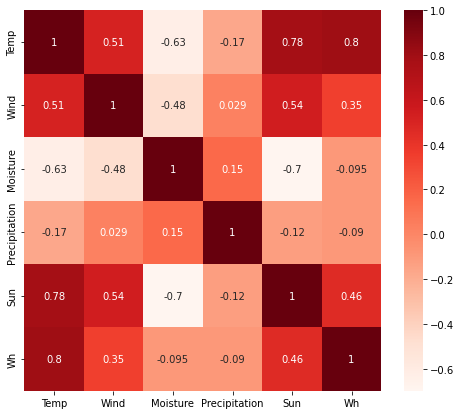

In [34]:
import seaborn as sns
train_all=train_x.join(train_y)
plt.figure(figsize=(8, 7))
corr=train_all.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
train_x.corrwith(train_y).sort_values(ascending=False)

Temp             0.803301
Sun              0.458348
Wind             0.349288
Precipitation   -0.090389
Moisture        -0.095042
dtype: float64

정답은 없습니다! 

다만 최종 선택한 변수(들)이 왜 선택받았는지 간단히 알려주세요.<br>
답변 : 온도 (Temp)<br>
Temp와 Output 변수 Wh 사이에 상관계수는 0.80으로, 강한 양의 상관관계가 나타난다.<br>
Wh에 대한 나머지 변수들의 상관계수는 0.5를 넘지 못하므로 선택하지 않는다.

## 전처리

위에서 선택한 변수들(feature)를 가지고 한번 전력 사용량을 예측하는 모델을 만들어 보기에 앞서,

**train 데이터의 feature의 전처리**를 진행해보려고 합니다. StandardScaler를 사용하셔도 좋고, MinMaxScaler를 사용하셔도 좋습니다! 

또한 PolynomialFeatures를 이용하거나 직접 feature를 계산하여 고차원의 feature를 만드셔도 좋습니다. 이 또한 정답은 없습니다!

이 때 최종 train_x의 shape은 (n_samples, n_features)가 되도록 해주세요.<br>
ex. 4개의 변수를 가진 1000개의 샘플의 경우 train_x.shape은 (1000,4)가 되면 됩니다.

특히 하나의 변수만을 사용하시는 분들은 1D가 아닌 2D가 되도록 신경써주세요<br>
ex. train_x.shape이 (1000,)이 아닌 (1000,1)입니다!

In [21]:
# 사용할 패키지를 import!
from sklearn.preprocessing import MinMaxScaler

In [159]:
train_x2=train_x.drop(['Wind','Moisture','Precipitation','Sun'], axis=1)
train_x2

,Temp
0,17.6
1,17.7
2,17.5
3,17.1
4,17.0
...,...
83,23.9
84,25.0
85,26.0
86,26.4


In [160]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_x2)
train_x2 = scaler.transform(train_x2)
train_x2

array([[0.20895522],
       [0.21641791],
       [0.20149254],
       [0.17164179],
       [0.1641791 ],
       [0.15671642],
       [0.14179104],
       [0.15671642],
       [0.2238806 ],
       [0.3358209 ],
       [0.42537313],
       [0.54477612],
       [0.61940299],
       [0.61940299],
       [0.65671642],
       [0.67164179],
       [0.71641791],
       [0.65671642],
       [0.58955224],
       [0.48507463],
       [0.37313433],
       [0.28358209],
       [0.23134328],
       [0.17910448],
       [0.13432836],
       [0.10447761],
       [0.08208955],
       [0.06716418],
       [0.05223881],
       [0.        ],
       [0.01492537],
       [0.05223881],
       [0.08955224],
       [0.15671642],
       [0.18656716],
       [0.20149254],
       [0.1119403 ],
       [0.20149254],
       [0.41791045],
       [0.45522388],
       [0.51492537],
       [0.47761194],
       [0.43283582],
       [0.41044776],
       [0.38059701],
       [0.35820896],
       [0.3358209 ],
       [0.313

In [52]:
train_x2.shape

(88, 1)

# 모델링

## 학습 

이제 모델링을 해봅시다.

앞서 다룬 여러 regression 모델들(Linear regression, Ridge Regression, Lasso Regression, ..)을 이용해서 fit을 진행해보도록 합시다.

In [43]:
# 사용할 패키지를 import!
from sklearn.linear_model import LinearRegression

In [161]:
linear_model = LinearRegression().fit(train_x2, train_y)

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [162]:
esti_y = linear_model.predict(train_x2)

In [163]:
print(linear_model.coef_)
print(type(linear_model.coef_))
print(linear_model.intercept_)

[667.47404771]
<class 'numpy.ndarray'>
7871.053242832668


In [164]:
linear_beta = linear_model.coef_[0]
linear_intercept = linear_model.intercept_
print(f"Beta :{linear_beta: .4f}")
print(f"Intercept : {linear_intercept: .4f}")

Beta : 667.4740
Intercept :  7871.0532


# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [165]:
def mse(pred, true):
    return np.mean((pred-true)**2)

In [166]:
train_mse = mse(esti_y, train_y)
print(f"Linear {train_mse:.5f}")

Linear 14543.75828


In [157]:
def visualize(model, x, y):
    if x.shape[1] != 1:
        return None
    beta = model.coef_[0]
    intercept = model.intercept_
    
    x_axis = np.linspace(np.min(x), np.max(x), 100)
    fit = intercept * x_axis**0 + beta*x_axis 

    plt.figure(figsize=(8,6))
    plt.plot(x_axis, fit, label='Predict', c='r', linewidth=3)
    plt.scatter(x, y, c='blue')
    plt.legend()
    plt.show()

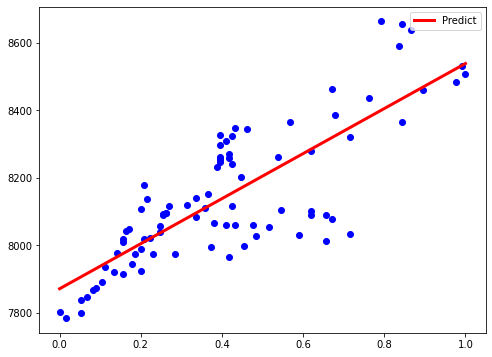

In [167]:
# visualization 하실 분은 진행해주세요!
visualize(linear_model, train_x2, train_y)

# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [168]:
# transform을 하시는 분들은 실행해주세요
test_x2=test_x.drop(['Wind','Moisture','Precipitation','Sun'], axis=1)
test_x2=scaler.transform(test_x2)
test_x2

array([[0.70895522],
       [0.62686567],
       [0.59701493],
       [0.51492537],
       [0.49253731],
       [0.44776119],
       [0.41044776],
       [0.38059701],
       [0.36567164],
       [0.35074627],
       [0.3358209 ],
       [0.3358209 ]])

In [169]:
# y1_hat에 predict값 할당
pred_y = linear_model.predict(test_x2)
pred_y

array([8344.26245576, 8289.46981005, 8269.54521161, 8214.75256591,
       8199.80911708, 8169.92221942, 8145.01647137, 8125.09187293,
       8115.12957371, 8105.16727449, 8095.20497527, 8095.20497527])

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [170]:
def score(train_mse, test_mse):
    print(f"{test_mse/train_mse: .4f}")

In [171]:
test_mse = mse(pred_y, test_y)
print(f"Linear {test_mse:.5f}")

Linear 198060.52184


In [172]:
score(train_mse,test_mse)

 13.6182


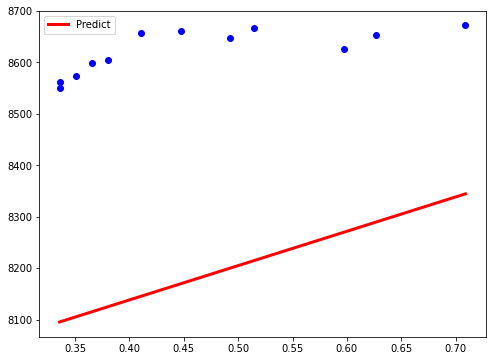

In [173]:
visualize(linear_model, test_x2, test_y)
#망..했다..

# 그 이후

이제 여러분들은 한번 모델을 만들어보고 fitting한 다음 예측까지 해보셨습니다.

이제 개선하기 위해 1.데이터부터 5.성능평가 중 수정, 변경하실 부분을 업데이트 해서  최적의 모델을 찾아보세요!

현재 사용하고 있는 scaler, model부터 전처리과정 기타 여러 조건을 조작해보시고 어떤 효과가 있는지 한번 보시고 알려주세요:D

고생하셨습니다!

In [174]:
#scaler 변경해보기 -> 뭐가 달라진 건지 모르겠다..
from sklearn.preprocessing import StandardScaler

train_x2=train_x.drop(['Wind','Moisture','Precipitation','Sun'], axis=1)
scaler2=StandardScaler()
scaler2=scaler2.fit(train_x2)
train_x2=scaler.transform(train_x2)
train_x2

array([[0.20895522],
       [0.21641791],
       [0.20149254],
       [0.17164179],
       [0.1641791 ],
       [0.15671642],
       [0.14179104],
       [0.15671642],
       [0.2238806 ],
       [0.3358209 ],
       [0.42537313],
       [0.54477612],
       [0.61940299],
       [0.61940299],
       [0.65671642],
       [0.67164179],
       [0.71641791],
       [0.65671642],
       [0.58955224],
       [0.48507463],
       [0.37313433],
       [0.28358209],
       [0.23134328],
       [0.17910448],
       [0.13432836],
       [0.10447761],
       [0.08208955],
       [0.06716418],
       [0.05223881],
       [0.        ],
       [0.01492537],
       [0.05223881],
       [0.08955224],
       [0.15671642],
       [0.18656716],
       [0.20149254],
       [0.1119403 ],
       [0.20149254],
       [0.41791045],
       [0.45522388],
       [0.51492537],
       [0.47761194],
       [0.43283582],
       [0.41044776],
       [0.38059701],
       [0.35820896],
       [0.3358209 ],
       [0.313

In [175]:
linear_model2=LinearRegression().fit(train_x2, train_y)
esti_y2=linear_model2.predict(train_x2)

In [176]:
linear_beta2=linear_model2.coef_[0]
linear_intercept2=linear_model2.intercept_
print(f"Beta :{linear_beta2: .4f}")
print(f"Intercept : {linear_intercept2: .4f}")

Beta : 667.4740
Intercept :  7871.0532


In [177]:
train_mse2=mse(esti_y2, train_y)
print(f"Linear {train_mse2:.5f}")

Linear 14543.75828


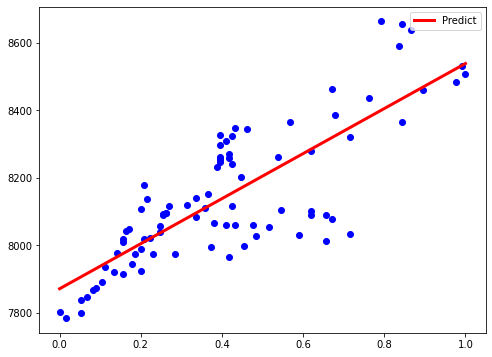

In [178]:
visualize(linear_model2, train_x2, train_y)

In [179]:
pred_y2=linear_model2.predict(test_x2)

In [180]:
test_mse2= mse(pred_y2, test_y)
print(f"Linear {test_mse2:.5f}")

Linear 198060.52184


In [181]:
score(train_mse2,test_mse2)

 13.6182


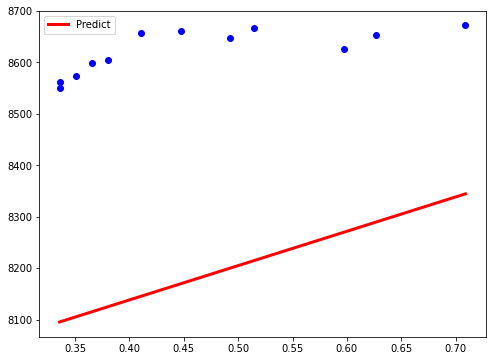

In [182]:
visualize(linear_model2, test_x2, test_y)
#????